## Projet 1 : Analyse Exploratoire des Données (EDA)

### Informations sur le Projet

- **Auteur** : Fono Colince  
  
- **Lien vers les datasets** :  
  - [Dataset : Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Description des Données
Le jeu de données contient des transactions bancaires :
- **V1-V28** : Variables anonymisées (issues d'une PCA).
- **Amount** : Montant de la transaction.
- **Class** : Indicateur de fraude (`1` pour fraude, `0` sinon).

In [3]:
data = pd.read_csv('../data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
pourcentage = (data['Class'].value_counts() / len(data))*100
pourcentage

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

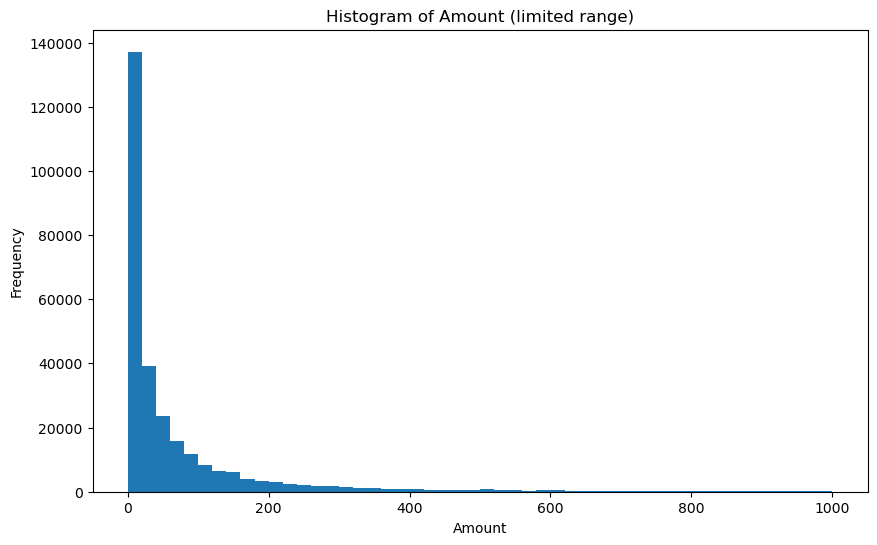

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=50, range=(0, 1000))  # Ajuste le range selon tes données
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount (limited range)')
plt.show()


### Analyse de la Réduction de Dimensions avec t-SNE

#### Résumé des Étapes du Code
1. **Sous-échantillonnage** :
   - Transactions frauduleuses conservées.
   - Transactions non frauduleuses réduites à un ratio de 19:1.

2. **Réduction de Dimensions avec t-SNE** :
   - Visualisation des données en 2 dimensions.

3. **Résultats** :
   - Graphique montre des regroupements distincts pour les transactions frauduleuses et non frauduleuses.
   - Graphique montre aussi d'autre regroupements possible de clients


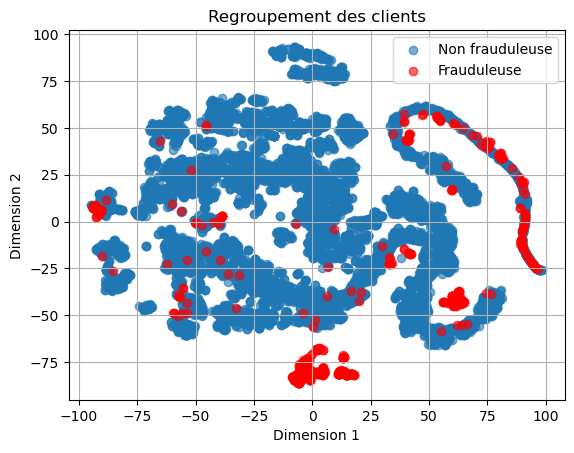

In [ ]:
from sklearn.manifold import TSNE

data_tsn =  data.sample(frac=1)

y = data['Class'].to_numpy()
X = data.drop(['Time','Class'],axis=1)
X = X.to_numpy()

mask = (y == 1)

X_frode = X[mask]
y_frode = y[mask]

X_sans_frode = X[:len(X_frode)*19]
y_sans_frode = y[:len(X_frode)*19]

X = np.vstack((X_sans_frode,X_frode))
y = np.hstack((y_sans_frode,y_frode))

tsn = TSNE(n_components=2, random_state=42)
X_tsn = tsn.fit_transform(X)



plt.scatter(X_tsn[y == 0, 0], X_tsn[y == 0, 1], label='Non frauduleuse', alpha=0.6)
plt.scatter(X_tsn[y == 1, 0], X_tsn[y == 1, 1], label='Frauduleuse', alpha=0.6, c='red')
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid()
plt.show()

### Machine Learning Model

####  Logistique Regression 

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

y = data['Class'].to_numpy()
X = data.drop(['Time','Class'],axis=1).to_numpy()



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled,y_train)

y_predic_test = model.predict(X_test_scaled)


In [75]:
print(confusion_matrix(y_true=y_test,y_pred=y_predic_test))

[[56855     9]
 [   42    56]]


In [76]:
print(classification_report(y_true=y_test, y_pred= y_predic_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
print(accuracy_score(y_true=y_test,y_pred=y_predic_test))

0.9991046662687406


In [87]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_true=y_test, y_score=y_pred_proba)

0.8550398264961585

In [93]:
proba = model.predict_proba(X_test)
proba

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.98405763e-01, 1.59423734e-03],
       ...,
       [9.98732159e-01, 1.26784099e-03],
       [9.99851928e-01, 1.48071854e-04],
       [0.00000000e+00, 1.00000000e+00]])

In [94]:
y_predic_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train,y_train)

ypred = model_2.predict(X_test)

In [96]:
print(confusion_matrix(y_true=y_test,y_pred=ypred))

[[56862     2]
 [   22    76]]


In [97]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_true=y_test, y_score=y_pred_proba)

0.8550398264961585

In [ ]:
+ 4: chatbop api reseignier dees franchizer api 

#### Gradient Boosting Models

In [101]:
import lightgbm as lgb

model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_predLGB = model.predict(X_test)


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


###

In [103]:
print(accuracy_score(y_test,y_predLGB))

0.9995786664794073


In [104]:
print(confusion_matrix(y_test,y_predLGB))

[[56855     9]
 [   15    83]]


In [105]:
y_pred_probaLGB = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_true=y_test, y_score=y_pred_probaLGB)

0.9821376531760707

#### apprentissage non supervisser

| **Algorithme**            | **Forme des Clusters**         | **Gère les Outliers** | **Besoin de n_clusters ?** | **Scalabilité** |
|---------------------------|--------------------------------|-----------------------|----------------------------|-----------------|
| K-Means                  | Sphérique                     | Non                   | Oui                        | Très rapide     |
| DBSCAN                   | Arbitrary (n'importe quoi)    | Oui                   | Non                        | Moyen           |
| GMM                      | Elliptique                    | Non                   | Oui                        | Moyen           |
| Mean Shift               | Arbitrary                     | Oui                   | Non                        | Lent            |
| Hierarchical Clustering  | N'importe quoi                | Non                   | Oui/Non                    | Lent            |
| Spectral Clustering      | Non linéaire                  | Non                   | Oui                        | Moyen           |
| BIRCH                    | N'importe quoi                | Non                   | Oui                        | Très rapide     |


In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(X_train_scaled)

cluster = kmeans.predict(X)

In [112]:

cluster[:4]

array([6, 7, 6, 6])

In [ ]:
size = 10000

tsn2 = TSNE(n_components=3, random_state=42)
X_tsn = tsn2.fit_transform(X[:size])

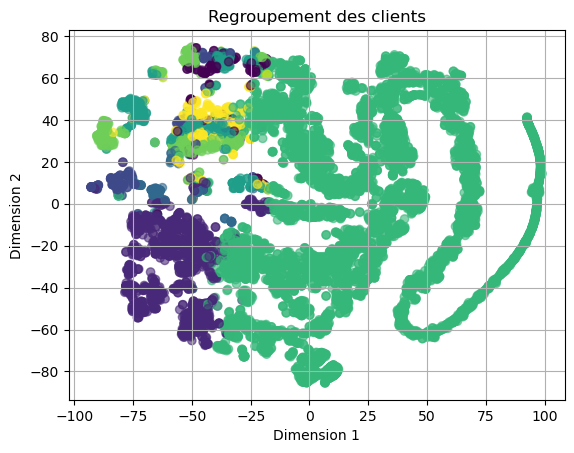

In [118]:
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c = cluster[:size], alpha=0.6)
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- Description : DBSCAN regroupe les points qui sont proches les uns des autres en fonction de leur densité locale. Il est particulièrement utile pour détecter des clusters de formes arbitraires et ignorer les outliers.

In [119]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(X)

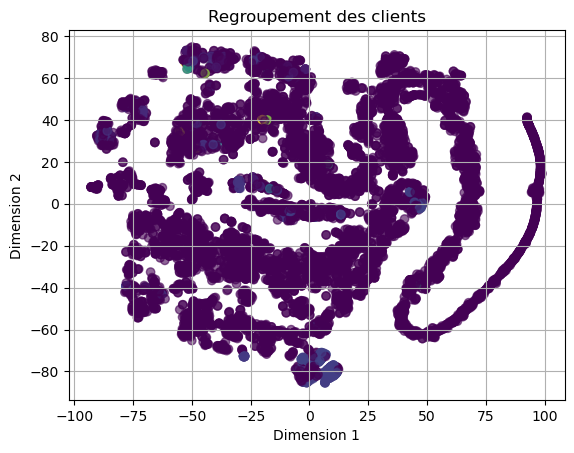

In [120]:
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c = labels[:size], alpha=0.6)
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

### Hierarchical Clustering (Clustering Hiérarchique)

- Description : Cet algorithme construit une hiérarchie de clusters sous forme d'un arbre (dendrogramme). Il existe deux approches :

- Agglomératif : On commence avec chaque point comme cluster individuel et on les fusionne progressivement.
-Divisif : On commence avec un seul cluster contenant tous les points et on le divise.

### 3. Gaussian Mixture Models (GMM)
- Description : GMM est une version plus flexible de K-Means. Il suppose que les données proviennent d'une combinaison de distributions gaussiennes. Chaque cluster est défini par une moyenne, une covariance et une probabilité.

- Avantages :

Permet de modéliser des clusters avec des formes elliptiques (non sphériques).
Fournit une probabilité pour chaque point d'appartenir à un cluster (soft clustering).
Inconvénients :

Plus lent que K-Means.
Nécessite un bon choix de n_clusters.

In [122]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2, random_state=42)
labelsG = model.fit_predict(X)

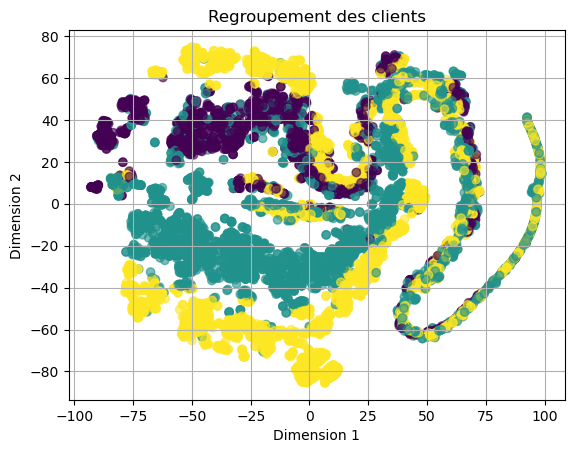

In [123]:
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c = labelsG[:size], alpha=0.6)
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

### 4. Mean Shift
- Description : Mean Shift est un algorithme qui regroupe les points en fonction de la densité du jeu de données. Il n’a pas besoin du nombre de clusters à l’avance.

- Avantages :

Pas besoin de spécifier le nombre de clusters.
Identifie les centres des clusters automatiquement.
Inconvénients :

Peut être coûteux computationnellement.
Sensible au choix de la taille de bande (bandwidth).

In [ ]:
from sklearn.cluster import MeanShift

model = MeanShift()
labelsMS = model.fit_predict(X)


In [ ]:
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c = labelsMS[:size], alpha=0.6)
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

### 7. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
- Description : BIRCH est conçu pour traiter de grands ensembles de données en créant des résumés de clusters (Clustering Features) avant d'effectuer le regroupement final.

- Avantages :

Convient pour de grands datasets.
Rapide et scalable.
- Inconvénients :

Moins précis pour des datasets complexes.

In [136]:
from sklearn.cluster import Birch

dataB = pd.read_csv('../data/creditcard.csv')

dataB =  data.sample(frac=1)
# Réduire à 10% des données
X_sample = dataB.sample(frac=0.1, random_state=42)

y = X_sample['Class'].to_numpy()
X = X_sample.drop(['Time','Class'],axis=1)
X = X.to_numpy()


model = Birch(n_clusters=10)
labelsB = model.fit_predict(X)

In [134]:
tsn3 = TSNE(n_components=2, random_state=42)
X_tsn3 = tsn2.fit_transform(X)

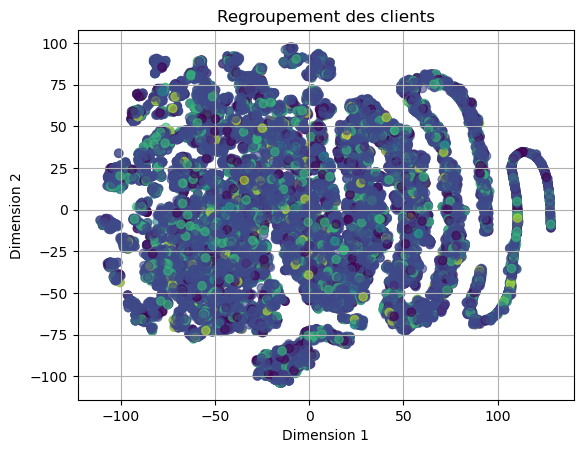

In [137]:
plt.scatter(X_tsn3[:, 0], X_tsn3[:, 1], c = labelsB, alpha=0.6)
plt.title('Regroupement des clients')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()